<a href="https://colab.research.google.com/github/tobonjose9/Tarea-1/blob/Tarea3/Tarea3/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea #: 3
## Por: Jose Alejandro Tobon
##Tema: Clasificación de datos utilizando imágenes
##Fecha entrega: 05/25/2025 11:55 PM
##Objetivo: Utilizar modelos de redes convolucionales para clasificación .
###Entrega: Crear una rama utilizando el mismo repositorio de la tarea 1 y 2, crear otra carpeta llamada tarea 3, solucionar el problema y crear un pull request sobre la master donde me debe poner como reviewer (entregas diferentes tienen una reducción de 0.5 puntos)

In [ ]:
!pip install opendatasets
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/competitions/uco-animals-vs-plants-2025/data25c1e3a5edfca3633e9faff9a7a6fbcf'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: josetobon
Your Kaggle Key: ··········
Your Kaggle Key: ··········


100%|██████████| 3.39G/3.39G [00:25<00:00, 143MB/s]



Extracting archive ./uco-animals-vs-plants-2025/uco-animals-vs-plants-2025.zip to ./uco-animals-vs-plants-2025


In [ ]:
import os
os.chdir('/content/uco-animals-vs-plants-2025')
os.listdir()

['test', 'uco-animals-vs-plants-2025', 'archive', 'train']

In [ ]:
import pandas as pd
archivo = 'train'

In [ ]:
import glob
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import os
import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Ruta base
base_path = '/content/uco-animals-vs-plants-2025/train'
categories = os.listdir(base_path)

X = []  # debe ser una lista
y = []  # debe ser una lista
img_size = (64, 64)
total_images_found = 0

for label, category in enumerate(categories):
    folder = os.path.join(base_path, category)
    image_paths = []
    for ext in ['*.jpg', '*.jpeg', '*.png', '*.JPG']:
        image_paths.extend(glob.glob(os.path.join(folder, ext)))

    for path in image_paths:
        try:
            img = load_img(path, target_size=img_size)
            img_array = img_to_array(img) / 255.0
            X.append(img_array)  #  Aquí debe ser una lista
            y.append(label)
            total_images_found += 1
        except Exception as e:
            print(f"Error loading image {path}: {e}")

# Finalmente convierte a numpy arrays
X = np.array(X)
y = np.array(y)

print(f"Total imágenes cargadas: {total_images_found}")



Total imágenes cargadas: 5406


In [ ]:
if total_images_found > 0:
    X_flat = X.reshape(len(X), -1)
    X_train, X_val, y_train, y_val = train_test_split(X_flat, y, test_size=0.2, random_state=42)

    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train, y_train)
    y_pred_log = logreg.predict(X_val)

    acc_log = accuracy_score(y_val, y_pred_log)
    print("Accuracy regresión logística:", acc_log)
else:
    print("No images were loaded. Cannot proceed with training the model.")


✅ Accuracy regresión logística: 0.43622920517560076


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Aplanar imágenes para regresión
test_flat = test_data.reshape(len(test_data), -1)
pred_labels_logreg = logreg.predict(test_flat)
pred_classnames_logreg = [label_map[label] for label in pred_labels_logreg]

# Crear CSV para Kaggle
df_logreg = pd.DataFrame({
    'file': filenames,
    'label': pred_classnames_logreg
})
df_logreg.to_csv('logreg_submission.csv', index=False)
print("✅ Archivo 'logreg_submission.csv' generado correctamente.")


✅ Archivo 'logreg_submission.csv' generado correctamente.


In [ ]:
if total_images_found > 0:
    X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X, y, test_size=0.2, random_state=42)

    # Import the necessary Keras components
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(len(categories), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train_cnn, y_train_cnn, epochs=5, validation_data=(X_val_cnn, y_val_cnn))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
136/136 ━━━━━━━━━━━━━━━━━━━━ 34s 230ms/step - accuracy: 0.1468 - loss: 2.5382 - val_accuracy: 0.3004 - val_loss: 2.0214
Epoch 2/5
136/136 ━━━━━━━━━━━━━━━━━━━━ 37s 201ms/step - accuracy: 0.4270 - loss: 1.6885 - val_accuracy: 0.5444 - val_loss: 1.3101
Epoch 3/5
136/136 ━━━━━━━━━━━━━━━━━━━━ 41s 201ms/step - accuracy: 0.6037 - loss: 1.1697 - val_accuracy: 0.6506 - val_loss: 1.0915
Epoch 4/5
136/136 ━━━━━━━━━━━━━━━━━━━━ 41s 203ms/step - accuracy: 0.6857 - loss: 0.9153 - val_accuracy: 0.6553 - val_loss: 1.0541
Epoch 5/5
136/136 ━━━━━━━━━━━━━━━━━━━━ 28s 207ms/step - accuracy: 0.7593 - loss: 0.7413 - val_accuracy: 0.6525 - val_loss: 1.0455


In [ ]:
# Leer imágenes de test
test_path = '/content/uco-animals-vs-plants-2025/test'
test_images = glob.glob(os.path.join(test_path, '*.jpg')) + \
              glob.glob(os.path.join(test_path, '*.jpeg')) + \
              glob.glob(os.path.join(test_path, '*.png')) + \
              glob.glob(os.path.join(test_path, '*.JPG'))

test_data = []
filenames = []

for path in test_images:
    try:
        img = load_img(path, target_size=img_size)
        img_array = img_to_array(img) / 255.0
        test_data.append(img_array)
        filenames.append(os.path.basename(path))
    except Exception as e:
        print(f"Error loading test image {path}: {e}")

test_data = np.array(test_data)

# Predicción con CNN
preds = model.predict(test_data)
pred_labels = np.argmax(preds, axis=1)

# Predecir con la red
preds_cnn = model.predict(test_data)
pred_labels_cnn = np.argmax(preds_cnn, axis=1)

# Create the label_map dictionary
# Assumes 'categories' list is available from the training data loading step
label_map = {i: category for i, category in enumerate(categories)}

pred_classnames_cnn = [label_map[label] for label in pred_labels_cnn]

# Crear CSV para Kaggle (formato correcto)
df_cnn = pd.DataFrame({
    'file': filenames,
    'label': pred_classnames_cnn
})
df_cnn.to_csv('cnn_submission.csv', index=False)
print("✅ Archivo 'cnn_submission.csv' generado correctamente.")


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step
✅ Archivo 'cnn_submission.csv' generado correctamente.


In [ ]:
from google.colab import files
files.download('logreg_submission.csv')
files.download('cnn_submission.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Compare el accuracy de los 2 modelos y realice una matriz de confusión.

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


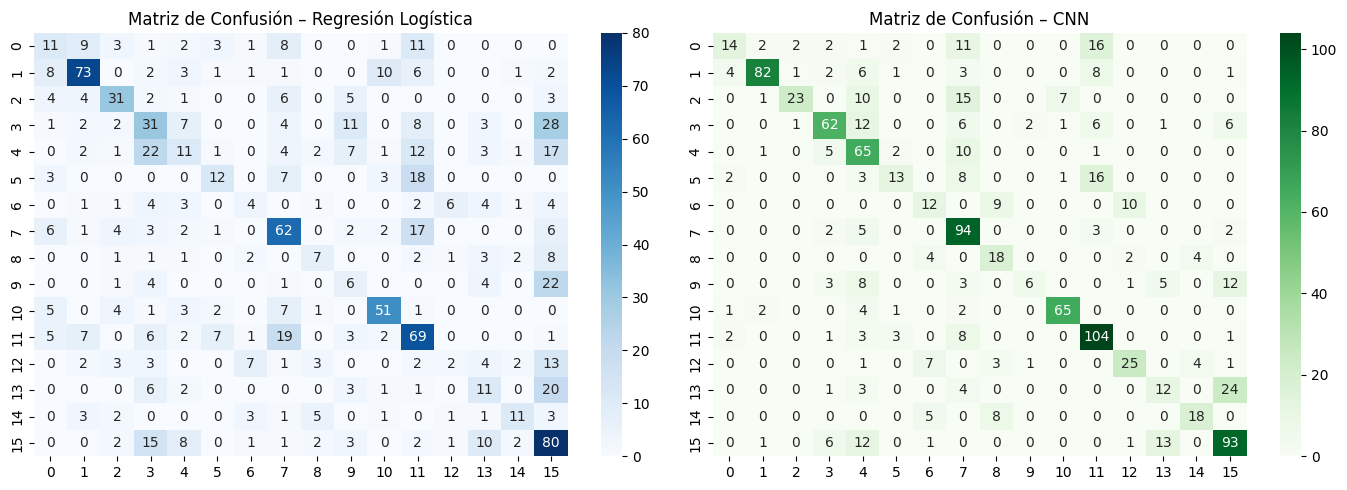

In [ ]:
if total_images_found > 0:
    # CNN
    y_pred_cnn = model.predict(X_val_cnn)
    y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)

    # Matrices de confusión
    cm_log = confusion_matrix(y_val, y_pred_log)
    cm_cnn = confusion_matrix(y_val_cnn, y_pred_cnn_labels)

    # Mostrar
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    sns.heatmap(cm_log, annot=True, fmt='d', ax=axs[0], cmap="Blues")
    axs[0].set_title("Matriz de Confusión – Regresión Logística")

    sns.heatmap(cm_cnn, annot=True, fmt='d', ax=axs[1], cmap="Greens")
    axs[1].set_title("Matriz de Confusión – CNN")

    plt.tight_layout()
    plt.show()


##Regresión Logística
* El modelo acierta en muchas clases, pero su rendimiento es muy inconsistente.

* Las clases 1, 7, 10, 11 y 15 tienen un número relativamente alto de predicciones correctas (73, 62, 51, 69, 80 respectivamente).

* Otras clases como la 5, 6 o 14 muestran errores graves de clasificación, con alta dispersión de predicciones incorrectas en muchas clases.

* Algunas clases tienen mucha confusión entre sí, como por ejemplo la clase 2, que es confundida frecuentemente con las clases 0, 1 y 12.

* Esto evidencia que la regresión logística no es efectiva para imágenes complejas, debido a su incapacidad para captar patrones espaciales y visuales importantes.

##Red Neuronal Convolucional (CNN)
* El rendimiento del modelo convolucional es mucho más alto y consistente.

* Clases como la 7, 10, 11 y 15 tienen una clara concentración de aciertos en la diagonal de la matriz de confusión (94, 65, 104, 93).

* La mayoría de las clases tienen más de 60 predicciones correctas, lo que indica un alto nivel de precisión.

* Aunque existe algo de confusión (por ejemplo, clase 0 con clase 6, o clase 2 con 10), esta es mínima en comparación con el modelo de regresión logística.

* La matriz de confusión muestra una fuerte concentración en la diagonal, lo cual es un indicio de un buen modelo de clasificación.

#Conclusión
1. La red convolucional (CNN) supera ampliamente a la regresión logística en la tarea de clasificación de imágenes del dataset "Animals vs Plants 2025".

2. Mientras que la regresión logística alcanza ciertos aciertos aislados, su matriz de confusión muestra un alto nivel de confusión y poca capacidad de generalización.

3. Por el contrario, la CNN demuestra ser mucho más precisa, gracias a su habilidad para capturar patrones espaciales, bordes, formas y texturas en las imágenes.

4. La elección de una arquitectura especializada como una red convolucional es crucial en tareas de visión por computadora, donde modelos lineales como la regresión logística fallan por diseño.